In [9]:
import numpy as np
def dec_to_bin(number: int, bits=-1):
    number=int(np.round(number, 0))
    neg=False
    out=""
    if (number<0):
        number*=-1
        number-=1
        neg=True
    while (number>0):
        res = number%2
        if (neg):
            res= 0 if (res==1) else 1
        out=f"{res}{out}"
        if (len(out)==(bits-1)):
            break
        number=int(number/2)
        
    if (neg):
        out=f"{1}{out}"
    else: out=f"{0}{out}"
    if (len(out)==0):
        out="0"
    while (len(out)<bits):
        out=f"{out[0]}{out}"
    return out
def bin_to_dec(number: str):
    output = 0
    neg = False
    if (number[0]=="1"):
        neg = True
    for i, char in enumerate(number[:0:-1]):
        if (neg):
            output+=(1-int(char))*(2**i)
        else:
            output+=int(char)*(2**i)
    if (neg):
        output*=-1
        output-=1
    return output

In [10]:
import numpy as np
test = np.load("X_test.npy")
test = test.flatten()
with open("X_test.txt", "w") as f:
    for num in test:
        num=num*(2**10)
        f.write(f"{dec_to_bin(num, 16)}\n")

In [11]:
import numpy as np
arr = np.load("X_test.npy")
NFRAC = 10
WIDTH = 16
with open("X_test.txt", "w") as f:
    for num in arr.flatten():
        num=num*(2**NFRAC)
        bin_num = dec_to_bin(int(np.round(num, 0)), WIDTH)
        f.write(f"{bin_num}\n")

print(arr)

[[-0.11950312  0.40616292 -1.04058613 ...  0.40865762 -1.01995561
  -0.18016747]
 [ 0.30887296  0.2271202  -1.15605569 ...  1.86744644 -1.23200286
  -1.19496887]
 [-1.26550208  0.66753284  1.40874527 ...  0.58246973  1.3092331
   1.75718066]
 ...
 [ 1.14562686 -0.46692901 -0.36909324 ... -1.18354148  0.05067312
  -0.68756817]
 [-0.1047317   0.3005048   1.3434744  ... -0.52088167  1.38000935
   0.23497856]
 [-0.91237697  0.72960102  0.17986115 ... -0.29436679  0.09422757
   0.55786991]]


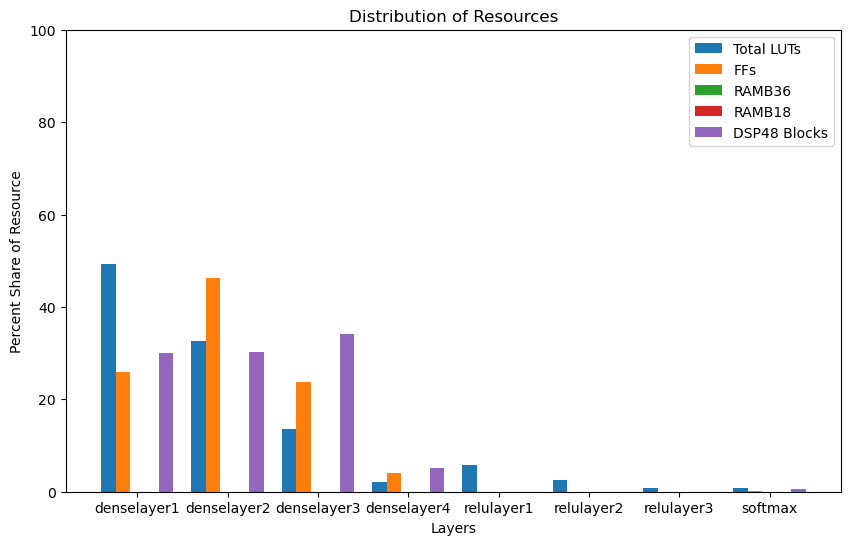

In [1]:
import re
maps = "Total LUTs | Logic LUTs | LUTRAMs | SRLs |  FFs | RAMB36 | RAMB18 | DSP48 Blocks"
pat = r".*?\s(\d+).*?\s\d+.*?\s\d+.*?\s\d+.*?\s(\d+).*?\s(\d+).*?\s(\d+).*?\s(\d+)"
# maps = maps.split(" | ")
# print(len(maps))
# for i in range(len(maps)):
#     pat = pat + r".*?\s(\d+)"
#pat = pat + r".*?(\d+)"
WIDTH = 16
NINT = 6
def extract_layers(file, layers):
    
    with open(file) as f:
        text = f.read()
    out = {}
    for layer in layers:
        m = re.search(layer + pat, text, re.IGNORECASE)
        new_layer = []
        i=1
        while True:
            try:
                new_layer.append(int(m.group(i)))
                i+=1
            except: break
        out[layer] = new_layer.copy()
    return out
layers = ["waiz_benchmark", "denselayer1", "denselayer2", "denselayer3", "denselayer4", "relulayer1", "relulayer2", "relulayer3", "softmax"]
output = extract_layers(f"../reports/{WIDTH}_{NINT}_hier_fx.rpt", layers)
import matplotlib.pyplot as plt
import numpy as np
maps = "Total LUTs | FFs | RAMB36 | RAMB18 | DSP48 Blocks"
maps = maps.split(" | ")
# Example data
data = output
keys = list(data.keys())[1:]
totals = data["waiz_benchmark"]
values = []
for key in keys:
    vals = data[key]
    new_vals = []
    for i, val in enumerate(vals):
        if (val>0):
            new_vals.append(100*(val/(totals[i])))
        else:
            new_vals.append(0)
    values.append(new_vals)
#values = list(data.values())

# Number of bars per group (length of list)
n_bars = len(values[0])
x = np.arange(len(keys))  # positions for each group

bar_width = 0.8 / n_bars  # distribute bars evenly within each group
plt.figure(figsize=(10, 6))
# Plot each set of bars
for i in range(n_bars):
    plt.bar(
        x + i * bar_width,
        [v[i] for v in values],
        width=bar_width,
        label = maps[i]
    )
plt.xticks(x + bar_width * (n_bars-1)/2, keys)
plt.ylabel('Percent Share of Resource')
plt.xlabel('Layers')
plt.ylim((0,100))
plt.title('Distribution of Resources')
plt.legend()
#plt.xticks(np.arange(4, 26, 3))
plt.show()


{'myproject': [69258, 39531, 0, 4, 2082], 'grp_dense_latency_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_1_fu_177': [16508, 8352, 0, 0, 456], 'grp_dense_latency_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_fu_103': [30418, 16598, 0, 0, 743], 'grp_dense_latency_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_s_fu_171': [16570, 8204, 0, 0, 632], 'grp_dense_latency_ap_fixed_ap_fixed_16_6_5_3_0_config14_0_0_0_0_0_0_fu_213': [2420, 1738, 0, 0, 119], 'grp_normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_1_fu_249': [1595, 1122, 0, 0, 64], 'grp_normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_2_fu_353': [764, 539, 0, 0, 31], 'grp_normalize_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_s_fu_317': [641, 528, 0, 0, 32], 'grp_softmax_stable_ap_fixed_ap_fixed_16_6_5_3_0_softmax_config16_s_fu_529': [191, 228, 0, 4, 5]}
[995, 68, 0, 0, 5] 
 [69258, 39531, 

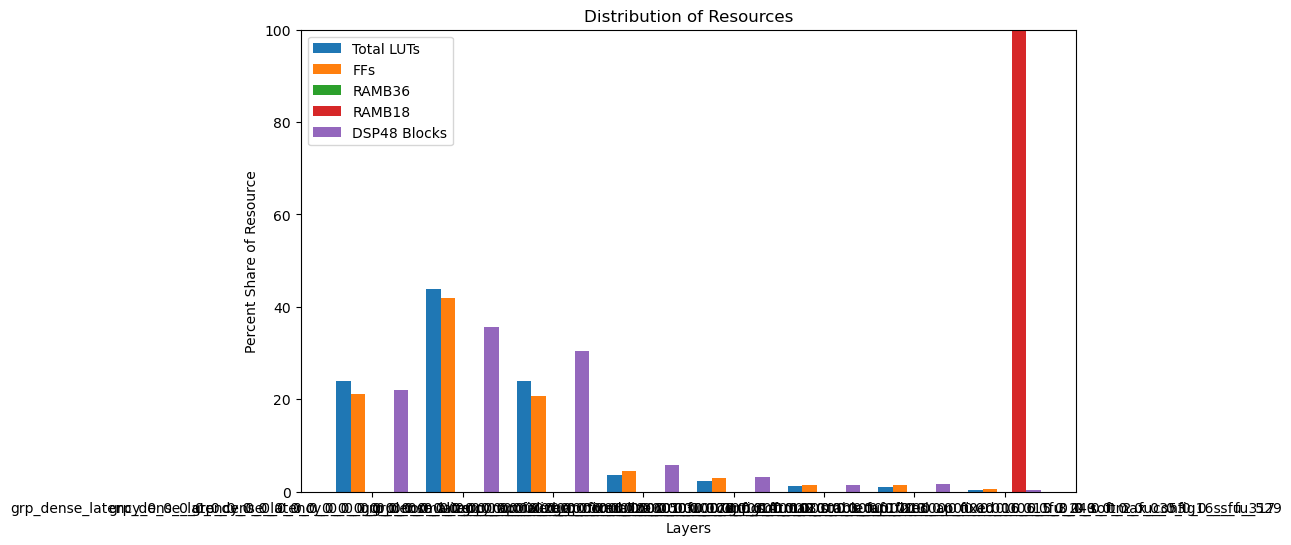

In [2]:
import re, numpy as np, matplotlib.pyplot as plt
maps = "Total LUTs | Logic LUTs | LUTRAMs | SRLs |  FFs | RAMB36 | RAMB18 | DSP48 Blocks"
pat = r"(\w+).*?\|.*?\|.*?\s(\d+).*?\s\d+.*?\s\d+.*?\s\d+.*?\s(\d+).*?\s(\d+).*?\s(\d+).*?\s(\d+)"
WIDTH = 16
NINT = 6
def extract_layers(file):
    
    with open(file) as f:
        text = f.read()
    out = {}
    
    matches = re.findall(pat, text)
    for match in matches:
        try:
            out[match[0]]
        except:
            out[match[0]] = [int(match[i]) for i in range(1,len(match))]
    return out
# layers = ["waiz_benchmark", "denselayer1", "denselayer2", "denselayer3", "denselayer4", "relulayer1", "relulayer2", "relulayer3", "softmax"]
output = extract_layers(f"./reports/hls_{WIDTH}_{NINT}_hier.rpt")
print(output)
# import matplotlib.pyplot as plt
# import numpy as np
maps = "Total LUTs | FFs | RAMB36 | RAMB18 | DSP48 Blocks"
maps = maps.split(" | ")
# # Example data
data = output
keys = list(data.keys())[1:]
totals = data["myproject"]
values = []
print(vals,"\n", totals)
for key in keys:
    vals = data[key]
    new_vals = []
    for i, val in enumerate(vals):
        if (val>0):
            new_vals.append(100*(val/(totals[i])))
        else:
            new_vals.append(0)
    values.append(new_vals)
#values = list(data.values())

# Number of bars per group (length of list)
n_bars = len(values[0])
x = np.arange(len(keys))  # positions for each group

bar_width = 0.8 / n_bars  # distribute bars evenly within each group
plt.figure(figsize=(10, 6))
# Plot each set of bars
for i in range(n_bars):
    plt.bar(
        x + i * bar_width,
        [v[i] for v in values],
        width=bar_width,
        label = maps[i]
    )
plt.xticks(x + bar_width * (n_bars-1)/2, keys)
plt.ylabel('Percent Share of Resource')
plt.xlabel('Layers')
plt.ylim((0,100))
plt.title('Distribution of Resources')
plt.legend()
#plt.xticks(np.arange(4, 26, 3))
plt.show()


In [3]:
ans = np.load("y_test.npy")
print(ans[0:10])

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


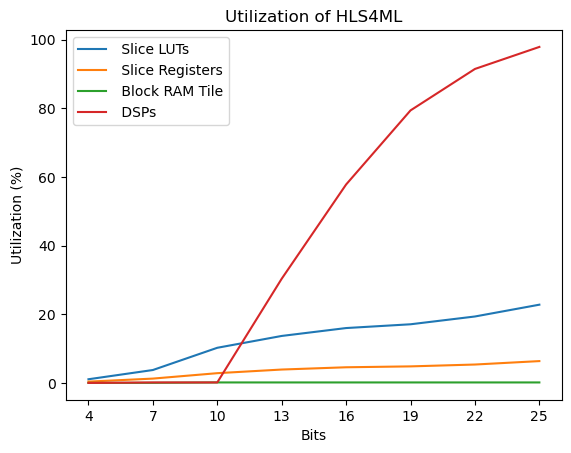

/tmp/ipykernel_2038415/3750407262.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


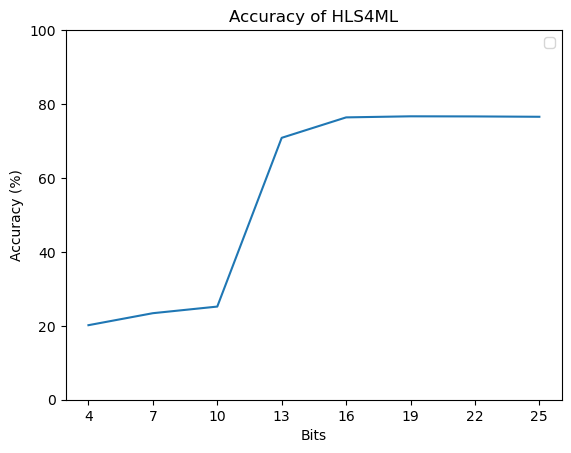

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
resources = pd.read_csv("util_hls.csv")
x_val = resources["Bits"]
all_res_hls = []
plt.xlabel("Bits")
plt.ylabel("Utilization (%)")
Nono = "Bits Accuracy Timing Bonded IOB"
for key in resources:
    if (key not in Nono):
        all_res_hls.append(resources[key])
        plt.plot(x_val, resources[key], label=key)

plt.legend()
plt.title("Utilization of HLS4ML")
plt.xticks(np.arange(4, 26, 3))
plt.show()
plt.xlabel("Bits")
plt.ylabel("Accuracy (%)")
hls_accuracy = resources[" Accuracy"]*100
plt.plot(x_val, resources[" Accuracy"]*100)
plt.title("Accuracy of HLS4ML")
plt.legend()
plt.xticks(np.arange(4, 26, 3))
plt.ylim(0,100)
plt.show()


In [5]:
args = ""
for i in range(2,10):
    acc = (3*i-2,i)
    #print((3*i-2,i))
    args = args + f"hls_{acc[0]}_{acc[1]} "
print(args)

hls_4_2 hls_7_3 hls_10_4 hls_13_5 hls_16_6 hls_19_7 hls_22_8 hls_25_9 


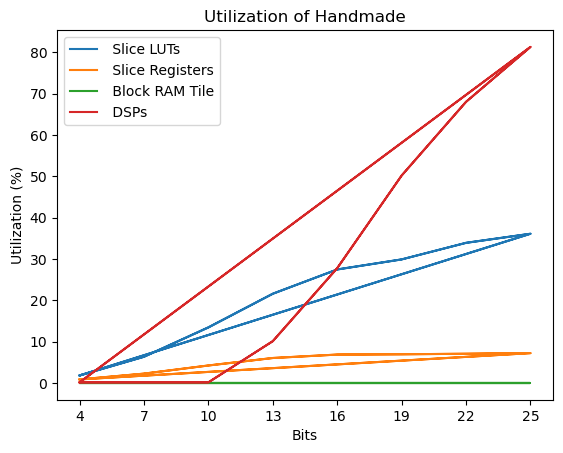

/tmp/ipykernel_2038415/3526943387.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


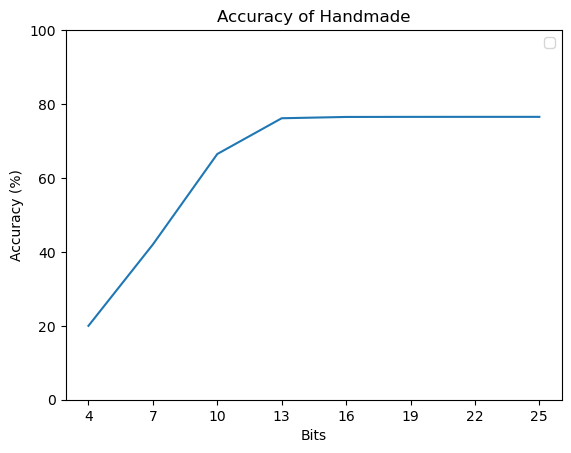

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
resources = pd.read_csv("../util.csv")
x_val = resources["Bits"]
all_res_hand = []
plt.xlabel("Bits")
plt.ylabel("Utilization (%)")
Nono = "Bits Accuracy Timing Bonded IOB"
for key in resources:
    if (key not in Nono):
        all_res_hand.append(resources[key])
        plt.plot(x_val, resources[key], label=key)

plt.legend()
plt.title("Utilization of Handmade")
plt.xticks(np.arange(4, 26, 3))
plt.show()
plt.xlabel("Bits")
plt.ylabel("Accuracy (%)")
hand_accuracy = resources[" Accuracy"]*100
plt.plot(x_val, resources[" Accuracy"]*100)
plt.title("Accuracy of Handmade")
plt.legend()
plt.xticks(np.arange(4, 26, 3))
plt.ylim(0,100)
plt.show()


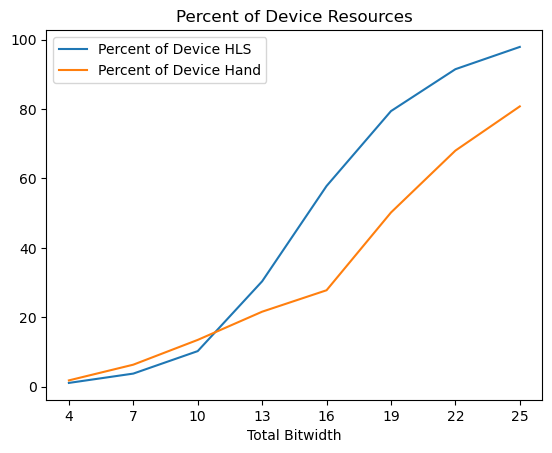

In [ ]:
max_hls = np.max(np.array(all_res_hls), axis=0)
max_hand = np.max(np.array(all_res_hand), axis=0)
plt.plot(x_val, max_hls, label="Percent of Device HLS")
plt.plot(x_val, max_hand, label="Percent of Device Hand")
plt.title("Percent of Device Resources")
plt.xlabel("Total Bitwidth")
plt.xticks(np.arange(4, 26, 3))
plt.legend()
plt.show()
plt.plot(x_val, hls_accuracy, label="HLS4ML Accuracy")
plt.plot(x_val, hand_accuracy, label="Handmade Accuracy")
plt.legend()
plt.show()